<a href="https://colab.research.google.com/github/JeongSoong/Machine_learning/blob/main/%EB%AC%B8%EC%A0%95%EC%88%98_201911047_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [24]:
file = "/content/data_ex.csv"
df = pd.read_csv(file)
df

,ID,SEX,AGE,AREA
0,1,F,50,Seoul
1,2,M,40,Kyengki
2,3,F,28,Jeju
3,4,M,50,Seoul
4,5,M,27,Seoul
5,6,F,23,Seoul
6,7,F,56,Kyengki
7,8,F,47,Seoul
8,9,M,20,Incheon
9,10,F,38,Kyengki


In [25]:
#결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10 non-null     int64 
 1   SEX     10 non-null     object
 2   AGE     10 non-null     int64 
 3   AREA    10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [26]:
df.shape

(10, 4)

In [27]:
df.sample(5, random_state=1)

,ID,SEX,AGE,AREA
2,3,F,28,Jeju
9,10,F,38,Kyengki
6,7,F,56,Kyengki
4,5,M,27,Seoul
0,1,F,50,Seoul


In [28]:
df.sample(frac=0.5)

,ID,SEX,AGE,AREA
4,5,M,27,Seoul
9,10,F,38,Kyengki
1,2,M,40,Kyengki
5,6,F,23,Seoul
2,3,F,28,Jeju


In [29]:
df.count()

ID      10
SEX     10
AGE     10
AREA    10
dtype: int64

In [30]:
df['AGE'].sum()

379

In [31]:
#수치형 데이터의 기술 통계량
df.describe()

,ID,AGE
count,10.00000,10.00000
mean,5.50000,37.90000
std,3.02765,12.76671
min,1.00000,20.00000
25%,3.25000,27.25000
50%,5.50000,39.00000
75%,7.75000,49.25000
max,10.00000,56.00000


In [32]:
#범주형 데이터
#unuque:범주형 데이터의 레벨 수
#freq:출현 횟수, 도수분포표
df[['SEX', 'AREA']].describe()

,SEX,AREA
count,10,10
unique,2,4
top,F,Seoul
freq,6,5


In [33]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [34]:
df['SEX'].value_counts()

F    6
M    4
Name: SEX, dtype: int64

In [35]:
df['SEX'].sort_values()

0    F
2    F
5    F
6    F
7    F
9    F
1    M
3    M
4    M
8    M
Name: SEX, dtype: object

In [36]:
df['AGE'].values.tolist()

[50, 40, 28, 50, 27, 23, 56, 47, 20, 38]

Text(0, 0.5, 'Num')

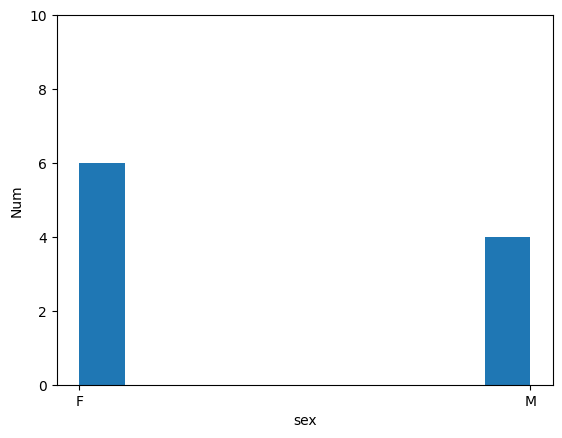

In [40]:
sex = df['SEX'].values.tolist()
plt.hist(sex, bins=10)
plt.ylim([0,10])
plt.xlabel("sex")
plt.ylabel("Num")

In [ ]:
#그룹화
grouped_sex=df.groupby("SEX")
print(grouped_sex)

In [ ]:
for key, value, in grouped_sex:
    print("key:", key)
    print("value:", value)

key: F
value:    ID SEX  AGE     AREA
0   1   F   50    Seoul
2   3   F   28     Jeju
5   6   F   23    Seoul
6   7   F   56  Kyengki
7   8   F   47    Seoul
9  10   F   38  Kyengki
key: M
value:    ID SEX  AGE     AREA
1   2   M   40  Kyengki
3   4   M   50    Seoul
4   5   M   27    Seoul
8   9   M   20  Incheon


In [ ]:
grouped_area=df.groupby("AREA")
print(grouped_area)

In [ ]:
for key, value, in grouped_area:
    print("key:", key)
    print("value:", value)

key: Incheon
value:    ID SEX  AGE     AREA
8   9   M   20  Incheon
key: Jeju
value:    ID SEX  AGE  AREA
2   3   F   28  Jeju
key: Kyengki
value:    ID SEX  AGE     AREA
1   2   M   40  Kyengki
6   7   F   56  Kyengki
9  10   F   38  Kyengki
key: Seoul
value:    ID SEX  AGE   AREA
0   1   F   50  Seoul
3   4   M   50  Seoul
4   5   M   27  Seoul
5   6   F   23  Seoul
7   8   F   47  Seoul


In [ ]:
df.groupby("SEX")

In [ ]:
df.groupby("SEX").sum()

,ID,AGE
SEX,,
F,35,242
M,20,137


In [ ]:
df["중년"] = df['AGE'] > 49
df

,ID,SEX,AGE,AREA,중년
0,1,F,50,Seoul,True
1,2,M,40,Kyengki,False
2,3,F,28,Jeju,False
3,4,M,50,Seoul,True
4,5,M,27,Seoul,False
5,6,F,23,Seoul,False
6,7,F,56,Kyengki,True
7,8,F,47,Seoul,False
8,9,M,20,Incheon,False
9,10,F,38,Kyengki,False


In [ ]:
def age_name(Age):
    name = ''
    if Age <= 25 : name = "사회초년생"
    elif Age <= 35 : name = "사회생활 1-10년차"
    elif Age <= 45 : name = "관리자"
    else : name = "은퇴 예정자"
    return name

In [ ]:
x = df['AGE']
df["AGED"] = df['AGE'].apply(lambda x : age_name(x))
df

,ID,SEX,AGE,AREA,중년,AGED
0,1,F,50,Seoul,True,은퇴 예정자
1,2,M,40,Kyengki,False,관리자
2,3,F,28,Jeju,False,사회생활 1-10년차
3,4,M,50,Seoul,True,은퇴 예정자
4,5,M,27,Seoul,False,사회생활 1-10년차
5,6,F,23,Seoul,False,사회초년생
6,7,F,56,Kyengki,True,은퇴 예정자
7,8,F,47,Seoul,False,은퇴 예정자
8,9,M,20,Incheon,False,사회초년생
9,10,F,38,Kyengki,False,관리자


멕시코풍 프렌차이즈 chipotie 메뉴 분석

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file = "/content/chipotle.tsv"
chipo = pd.read_csv(file, sep="\t")
print(chipo.shape)
print("================================================")
print(chipo.info())
print("================================================")

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [ ]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [ ]:
print(chipo.describe())

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


In [ ]:
chipo[["item_name", "choice_description", "item_price"]].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


Text(0.5, 1.0, 'Distribution of all ordered item count')

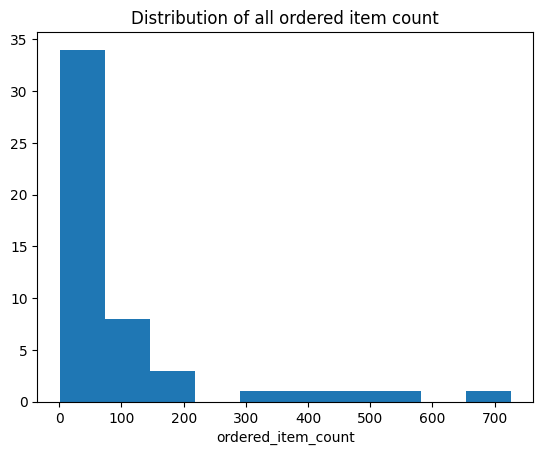

In [47]:
item_count = chipo['item_name'].value_counts()
item_count
plt.hist(item_count, bins=10)
plt.xlabel("ordered_item_count")
plt.title("Distribution of all ordered item count")

가장 많이 주문한 메뉴 TOP10 출력

In [ ]:
item_count = chipo["item_name"].value_counts()
item_count

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [ ]:
item_name_1 = chipo['item_name'].value_counts()[:1]
item_name_1

Chicken Bowl    726
Name: item_name, dtype: int64

Text(0, 0.5, 'ordered_item_count')

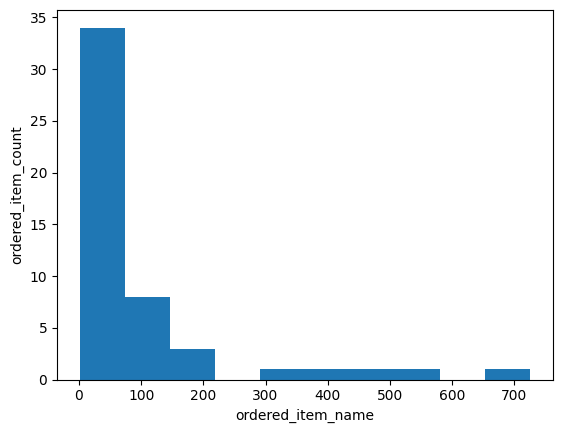

In [46]:
item_name = chipo['item_name'].value_counts()
plt.hist(item_name, bins=10)
plt.xlabel("ordered_item_name")
plt.ylabel("ordered_item_count")

2.아이템당 주문 개수와 총량 구하기

In [ ]:
item_quantity = chipo.groupby('item_name')['quantity'].count()
item_quantity

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [14]:
item_quantity.index

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

In [15]:
item_quantity.values

array([ 54,  66,  91,  11,  10,  25, 162,   2,   6, 104, 301,  68,  59,
         7,   1,   6,  40, 726, 553,  47,   9, 110, 115, 211, 110, 479,
         1,  22,  18,  43,  48,  31,  20,   2,  20,  27,   2, 101, 211,
       368,  35,   4,  29,  55,  85,  95,   1,   6,  18,   7])

In [16]:
item_quantity_index = item_quantity.index.tolist()
len(item_quantity_index)

50

In [65]:
x =np.arange(len(item_quantity_index))
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [62]:
order_cnt= item_quantity.values.tolist()
print(order_cnt)

[54, 66, 91, 11, 10, 25, 162, 2, 6, 104, 301, 68, 59, 7, 1, 6, 40, 726, 553, 47, 9, 110, 115, 211, 110, 479, 1, 22, 18, 43, 48, 31, 20, 2, 20, 27, 2, 101, 211, 368, 35, 4, 29, 55, 85, 95, 1, 6, 18, 7]


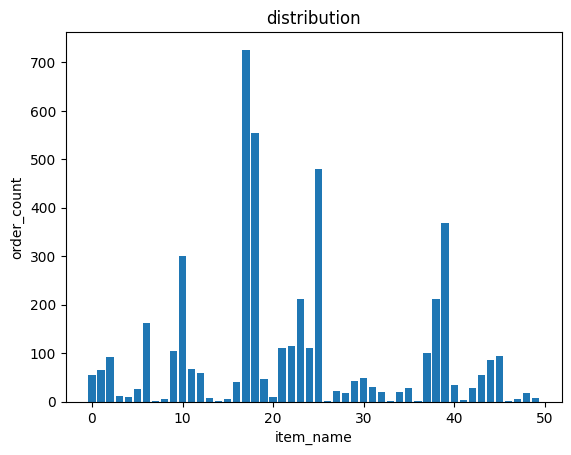

In [21]:
##bar(x,y)
plt.bar(x,order_cnt)
plt.xlabel("item_name")
plt.ylabel("order_count")
plt.title("distribution")
plt.show()

아이템별 주문금액 분포도도

In [55]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [57]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [61]:
##item_price를 수치형으로 변환
x= chipo['item_price']
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))

TypeError: ignored

In [56]:
##주문번호당 평균 금액 계산
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [66]:
item_price = chipo.groupby('order_id')['item_price'].sum()

In [67]:
item_price_index=item_price.index.tolist()

In [68]:
x = np.arange(len(item_price_index))
x

array([   0,    1,    2, ..., 1831, 1832, 1833])

In [71]:
item_price_values = item_price.values.tolist()

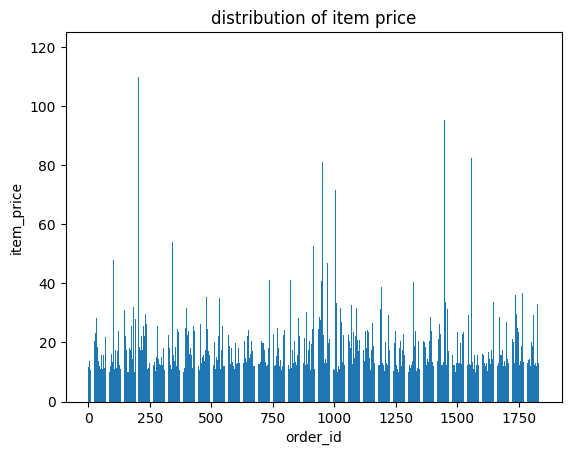

In [72]:
plt.bar(x,item_price_values)
plt. xlabel('order_id')
plt. ylabel('item_price')
plt.ylim([0,125])
plt.title('distribution of item price')
plt.show()

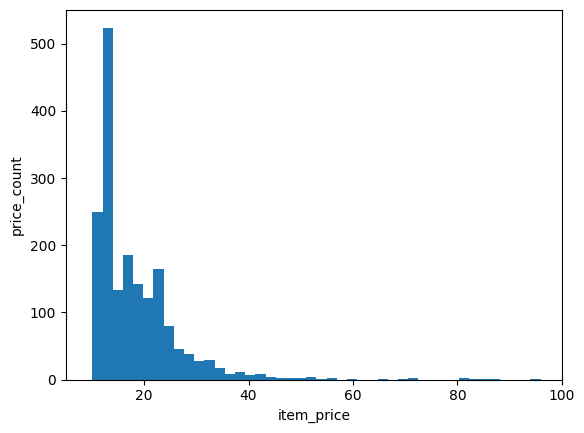

In [94]:
##hist() 그리기

plt.hist(item_price,bins =100)
plt.xlim([5,100])
plt.xlabel('item_price')
plt.ylabel('price_count')
plt.show()